# 2. Inspecting the Estimator

### Objectives
* Inspect the estimator after it has been trained
* Find the parameter values of the model
* Manually calculate the probabilities by defining a custom function
* Plot the estimated probability curve

## Redo our logistic regression output
Let's rerun the same commands to build a logistic regression model with the heart disease dataset, using `max_hr` as the predictor variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
heart = pd.read_csv('../data/heart.csv')
ca_fill = heart['ca'].value_counts().index[0]
thal_fill = heart['thal'].value_counts().index[0]
heart = heart.fillna({'ca': ca_fill, 'thal': thal_fill})

X = heart['max_hr'].values.reshape(-1, 1)
y = heart['disease'].values

In [3]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Attributes and methods of our Estimator
Our estimator object, `logr` in this case, has some interesting attributes and methods worth exploring.

### Return all the values of the hyperparameters
When we instantiated our model, we set all the model hyperparameters with the default values. We can retrieve them with the `get_params` method.

In [ ]:
logr.get_params()

### All of these are available directly as attributes
You can directly access these hyperparameters as attributes from `logr`. Let's see a few examples:

In [ ]:
logr.C

In [ ]:
logr.fit_intercept

### Retrieve the classes
Another useful attribute is `classes_` which hold the unique class labels.

In [ ]:
logr.classes_

## Making a prediction for all possible values
To help get a better sense of how `max_hr` relates to heart disease, we can make a prediction for every (integer) value between the minimum and maximum `max_hr`. The NumPy `arange` function creates evenly spaced one-dimensional arrays from given start, stop, and step values.

In [4]:
X.min(), X.max()

(71, 202)

In [5]:
inputs = np.arange(X.min(), X.max()).reshape(-1, 1)
inputs[:5]

array([[71],
       [72],
       [73],
       [74],
       [75]])

In [6]:
inputs[-5:]

array([[197],
       [198],
       [199],
       [200],
       [201]])

In [7]:
logr.predict(inputs)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Logistic Regression returns a probability
Although our logistic regression model returned 0's and 1's above, it is actually producing a probability between 0 and 1. The `predict` method simply returns 0 if this probability is less than .5 and 1 if it is greater.

## View the underlying probabilities with `predict_proba`
Instead of calling the `predict` method, call the `predict_proba` method to return the actual underlying probabilities for each class.

In [8]:
probs = logr.predict_proba(inputs)
probs[:10].round(2)

array([[0.15, 0.85],
       [0.16, 0.84],
       [0.16, 0.84],
       [0.16, 0.84],
       [0.17, 0.83],
       [0.17, 0.83],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.18, 0.82],
       [0.18, 0.82]])

### Why does `predict_proba` return two columns? 
The `predict_proba` method returns a probability for each unique prediction class. Since we have two classes (No and Yes) it returns two columns.

### The meaning of the first row
The first row above shows its two values as .15 and .85. This means that the model is predicting a person with a `max_hr` of 71 to have a 15% chance of not having heart disease and an 85% chance of having it.

### Visualizing the probability for all possible values of `max_hr`
The scatterplot below shows the true outcome (0 or 1) for each value of `max_hr` in our actual dataset. Additionally, the estimated probabilities are drawn with a line plot.

Text(0.5, 0, 'max_hr')

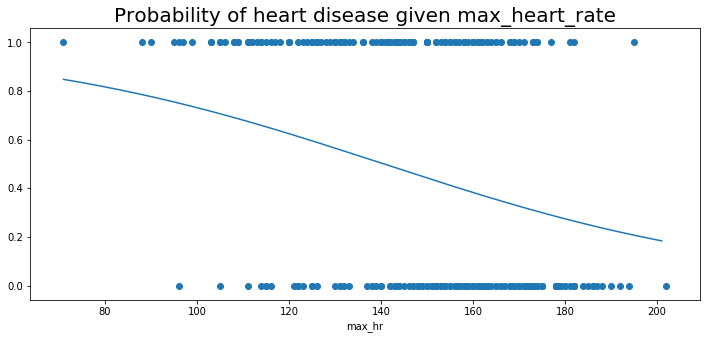

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(inputs, probs[:, 1])
ax.scatter(X, y)
ax.set_title('Probability of heart disease given max_heart_rate', fontsize=20);
ax.set_xlabel('max_hr')

## Isn't logistic regression supposed to draw an S curve?
If you run a Google image search on "logistic regression", you will see lots of steeper curves with an appearance similar to the letter "s". The plot of probabilities above doesn't quite look like those images.

### Use a wider range of data
Notice at the end points of the graph above, our probabilities don't reach 0 or 1. If we use a wider range for `max_hr` - much further outside the range that is possible - and calculate the probabilities again, we will then get our s-curve.

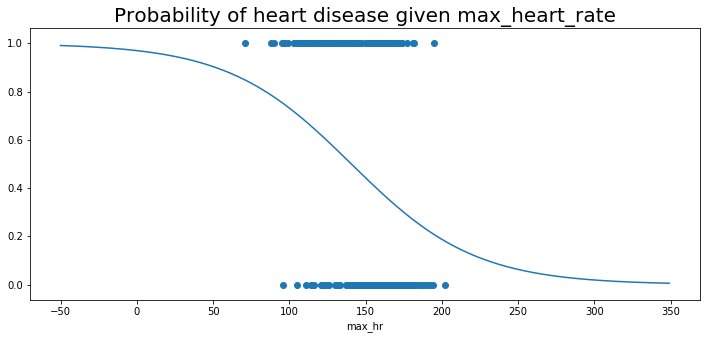

In [10]:
x = np.arange(-50, 350)
x = x.reshape(-1, 1)
probs = logr.predict_proba(x)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x, probs[:, 1])
ax.scatter(X, y)
ax.set_xlabel('max_hr')
ax.set_title('Probability of heart disease given max_heart_rate', fontsize=20);

## The parameter values of the logistic regression model
With one feature, the logistic regression model is mathematically defined as the following equation:

## $$ y = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)} }$$

There are two parameters in this model. $\beta_0$ is called the **bias** term (or intercept) and $\beta_1$ is the **coefficient** corresponding to `max_hr`. For each additional features in the model, there would be an additional parameter.

### Accessing the parameters from our object
The bias and coefficient terms are found respectively in the `intercept_` and `coef_` attributes of `logr`.

In [11]:
logr.intercept_

array([3.47208985])

In [12]:
logr.coef_

array([[-0.02468694]])

## Calculating the probabilities manually
Let's define a function that calculates the probability from the logistic regression equation.

In [14]:
def compute_probs(x):
    x1 = logr.intercept_ + logr.coef_ * x
    return 1 / (1 + np.exp(-x1))

## Test out our function
Our function only returns the a single column array, the probability of having heart disease.

In [15]:
probs = logr.predict_proba(inputs)
my_probs = compute_probs(inputs)
my_probs[:5]

array([[0.84804084],
       [0.84483208],
       [0.84156823],
       [0.83824887],
       [0.83487361]])

## Verify the output is the same
To verify that the output is the same, we can use the `allclose` NumPy function which returns a single boolean value if every value in the two arrays are within some small margin of error.

In [16]:
np.allclose(probs[:, 1], my_probs[:, 0])

True

# Exercises

### Problem 1
<span  style="color:green; font-size:16px">Use the docstrings to help you complete the following function. Test your function with different inputs.</span>

In [ ]:
def log_reg_learn_plot(df, columns, target):
    """
    This function produces a single plot of the actual values of the target 
    variable along with the estimated probability curve from the logistic 
    regression model. It will be able to produce the plot above in this workbook, 
    but for several columns.
        
    Parameters
    ----------
    df: A Pandas DataFrame ready for machine learning
    
    columns: A list of string names of columns to use to 
        train the model.
        
    target: a single string of the target variable column name
    
    How to implement
    ----------------
    For every column in the `columns` list:
        * Train a logistic regression model with that column as the only feature
        * Use the `target` string column name as the target variable
        * Use np.linspace to create an array of 100 inputs from min to max of that column
        * Calculate a probability of being in each class for each input
        * Make a scatterplot of the values of the column vs the true value of the output (0 or 1)
        * Make a line plot of the inputs vs the calculated probability
        * Make sure you are using a new Axes for every column
        * Use a single Figure if you can
    """
    pass

In [ ]:
# test with this
log_reg_learn_plot(heart, ['max_hr', 'chol', 'old_peak', 'rest_bp'], 'disease')